# AI Project 3
## Arman Rostami

In this project, a naive bayes classifer is implemented to predict poem of given poet is saadi or hafez.

## Naive Bayes

Naive Bayes is a model-based classification approach in which labels and features are random variables. In Naive Bayes model we assume all features are independent effects of label. This assumption decreases calculations of probabilities in the problem.

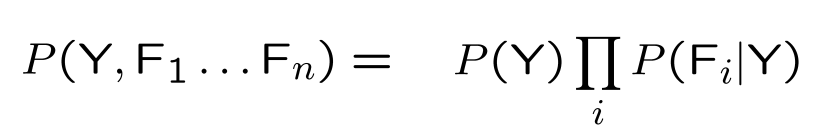

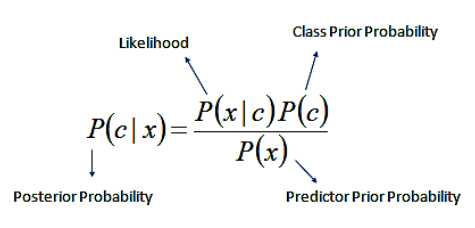

### Features

In this problem, each word is a binary feature which represents occurance of word in given poem.

### Posterior probability

Posterior probability $P(c | x)$ in this problem is probability of given peom belonging to poet c given x words of poem as features.

### Likelihood

Likelihood $P(x | c)$ in this problem indicates probability of existing words given poem is c.

### Class Prior Probability

Class Prior Probability $P(c)$ indicates probability of given poem belongs to poet c.

### Predictor Prior Probabilty

Predictor Prior Probability $P(x)$ indicates probability of having words x. This expression doesn't need to be calculated since we are comparing probabilities of poets given features and this expression is simplified in comparrission.

## Implementation

### Import libraries

In [1]:
import pandas as pd
import numpy as np

### Read Data

In [2]:
def read_data(filename):
    return pd.read_csv(filename)

### Clean Data

The half-space character in dataset is replaced with 'ـ' character since this character was assumed by split() function as an seperator.

In [3]:
def clean_data(data):
    data['text'] = data['text'].str.replace(u'\u200c', 'ـ')
    return data

## Classifier

In [4]:
class Bayesian_classifier:
    def __init__(self, train_data):
        self.train_data = train_data

This function is used to train our classifier from given dataset as constructor value. function calc_occurrences counts number of occurrences and calc_probabilities calculates probabilities needed to predict new poems.

In [5]:
def train(self):
    self.calc_occurrences()
    self.calc_probabilities()

Bayesian_classifier.train = train

The following function is used to get size of words dictionary which are words representing in given dataset.

In [6]:
def get_occurrences_count(self):
    occurrences_count = len(self.hafez_words)
    
    for word in self.saadi_words:
        if word not in self.hafez_words:
            occurrences_count += 1
            
    return occurrences_count

Bayesian_classifier.get_occurrences_count = get_occurrences_count

In [7]:
def calc_occurrences(self):
    self.hafez_words = self.calc_poet_occurrences('hafez')
    self.saadi_words = self.calc_poet_occurrences('saadi')
    self.hafez_words_count = sum(self.hafez_words.values())
    self.saadi_words_count = sum(self.saadi_words.values())
    self.all_count = self.get_occurrences_count()
    
Bayesian_classifier.calc_occurrences = calc_occurrences

The following function calculates words occurrency of given poet and saves them in a dict data structure.

In [8]:
def calc_poet_occurrences(self, poet_name):
    poet_occurrences = dict()
    poet_data = train_data[train_data['label'] == poet_name]
    
    for poem in poet_data['text']:
        poem_words = poem.split()
        for word in poem_words:
            poet_occurrences[word] = 1 + poet_occurrences.get(word, 0)
    
    return poet_occurrences
            
Bayesian_classifier.calc_poet_occurrences = calc_poet_occurrences   

This function calculates probabilities needed to predict new poems. To calculate probability of a word given it's poet, number of occurrences of word is divided by sum of poet's all word occurrences. Poet probability is also calculated as number of given poet's poems divided by number of all poems.

In [9]:
def calc_probabilities(self):
    self.prob_given_hafez = dict()
    self.prob_given_saadi = dict()
    
    for word in self.hafez_words:
        self.prob_given_hafez[word] = (self.hafez_words[word] / self.hafez_words_count)
    for word in self.saadi_words:
        self.prob_given_saadi[word] = (self.saadi_words[word] / self.saadi_words_count)
    
    poems_count = len(train_data)
    hafez_poems_count = len(train_data[train_data['label'] == 'hafez'])
    self.prob_hafez = hafez_poems_count / poems_count
    self.prob_saadi = 1 - self.prob_hafez
    
Bayesian_classifier.calc_probabilities = calc_probabilities

The following function returns an boolean indicating given poem belongs to hafez or not by calculating probability of given poem's word as feature given poets and comparing value of each calculated probability. Note that probability of given words is not calculated since it can be simplified in comparison.

In [10]:
def is_hafez_poem(self, poem):
    poem_words = poem.split()
    prob_poem_hafez = self.prob_hafez
    prob_poem_saadi = self.prob_saadi
    
    for word in poem_words:
        if word in self.hafez_words or word in self.saadi_words:
            prob_poem_hafez *= self.prob_given_hafez.get(word, 0)
            prob_poem_saadi *= self.prob_given_saadi.get(word, 0)
    
    return (prob_poem_hafez > prob_poem_saadi)

Bayesian_classifier.is_hafez_poem = is_hafez_poem

Following function calculates recall which is number of correct detected hafeze poems divided by number of all hafezes poems.

In [11]:
def get_recall(self, data):
    correct_detected_hafez = len(data[(data['label'] == 'hafez') & (data['predict'] == 'hafez')])
    all_hafezes = len(data[data['label'] == 'hafez'])
    
    return correct_detected_hafez / all_hafezes

Bayesian_classifier.get_recall = get_recall

Following function calculates precision which is number of corrected detected hafez poems divided by number of all detected hafez poems.

In [12]:
def get_precision(self, data):
    correct_detected_hafez = len(data[(data['label'] == 'hafez') & (data['predict'] == 'hafez')])
    detected_hafezes = len(data[data['predict'] == 'hafez'])
    
    return correct_detected_hafez / detected_hafezes

Bayesian_classifier.get_precision = get_precision

Following function calculates accuracy which is number of correct detected poems divided by all number of all poems.

In [13]:
def get_accuracy(self, data):
    total = len(data)
    correct_detected_hafez = len(data[(data['label'] == 'hafez') & (data['predict'] == 'hafez')])
    correct_detected_saadi = len(data[(data['label'] == 'saadi') & (data['predict'] == 'saadi')])
    correct_detected = correct_detected_hafez + correct_detected_saadi
    
    return correct_detected / total
    
Bayesian_classifier.get_accuracy = get_accuracy

Following function is used to predict and test the given test dataset.

In [14]:
def test(self, test_data):
    result = test_data.apply(lambda poem : ('hafez' if self.is_hafez_poem(poem['text']) else 'saadi'), axis = 1)
    frame = { 'label': test_data['label'], 'predict': result }
    result_df = pd.DataFrame(frame)
    
    print("Recall: %s" % self.get_recall(result_df))
    print("Precision: %s" % self.get_precision(result_df))
    print("Accuracy: %s" % self.get_accuracy(result_df))
    
Bayesian_classifier.test = test

## Results

In [15]:
data = read_data('train_test.csv')
data = clean_data(data)

train_bools = np.random.rand(len(data)) < 0.8
train_data = data[train_bools]
test_data = data[~train_bools]

classifier = Bayesian_classifier(train_data)
classifier.train()
classifier.test(test_data)

Recall: 0.6570418385385975
Precision: 0.7448229792919172
Accuracy: 0.7687140115163148


## Extra Questions

1) Precision values only cares about number of correct detected indicated values divided by number of all detected values which doesn't calculate false values. There are situations in which only a few correct of indicated type is detected and all of them is correct detected but any other input is wrongly detected and is not calcuated in precision. For example a machine learning model which detects pictures of cats and dog. In this model, classifer can only label one picture as cat and this label is true but all other labels are wrong predicted. In this situation there is a precision of 100% but only one input is correctly labeled.

2) Accuracy works well if data is distributed in an equal manner. If it's not calculated correctly it can lead to situations in which, model can label without making any predictions on datas with higher frequency and get a high accuracy. For example a maching learning model whihc detects pictures of cats and dogs can reach 80% accuracy on a dataset with 80% cat pictures and 20% dog pictures by putting cat label on all pictures.

## Laplace Smoothing

Having a word which only exists on one poet words leads to a situation in which the given poem is assigned immediately to poet with given word. It happens since probability of word given is zero and it results a zero value in calculating probability. This zero value is multiplied in probability and leads to a zero probability for poet who doesn't have the given word. One solution to this problem is using Laplace Smoothing in which some constant values are added to nominator and denominator of each given poet probability. A value 1 is added to nominator and a value (1 + words dictonary size) is added to denominator. It can be done since probability of a word not existing in given words is 1 / (1 + poet words + all words size).

In [16]:
def calc_probabilities_laplace(self):
    self.prob_given_hafez = dict()
    self.prob_given_saadi = dict()
    
    for word in self.hafez_words:
        self.prob_given_hafez[word] = ((self.hafez_words[word] + 1) / (self.hafez_words_count + 1 + self.all_count))
    for word in self.saadi_words:
        self.prob_given_saadi[word] = ((self.saadi_words[word] + 1) / (self.saadi_words_count + 1 + self.all_count))
    
    poems_count = len(train_data)
    hafez_poems_count = len(train_data[train_data['label'] == 'hafez'])
    self.prob_hafez = hafez_poems_count / poems_count
    self.prob_saadi = 1 - self.prob_hafez
    
Bayesian_classifier.calc_probabilities = calc_probabilities_laplace

In [17]:
def is_hafez_poem_laplace(self, poem):
    poem_words = poem.split()
    prob_poem_hafez = self.prob_hafez
    prob_poem_saadi = self.prob_saadi
    
    for word in poem_words:
        prob_poem_hafez *= self.prob_given_hafez.get(word, (1 / (self.hafez_words_count + 1 + self.all_count)))
        prob_poem_saadi *= self.prob_given_saadi.get(word, (1 / (self.saadi_words_count + 1 + self.all_count)))
    
    return (prob_poem_hafez > prob_poem_saadi)

Bayesian_classifier.is_hafez_poem = is_hafez_poem_laplace

Since multiplying small probabilities can lead to very small values, comparision of probabilities can be calculated by summing logarithm of given probabilities instead of mulityplying them. This implementation is shown below.

In [39]:
from math import log

def is_hafez_poem_laplace_log(self, poem):
    poem_words = poem.split()
    prob_poem_hafez = log(self.prob_hafez)
    prob_poem_saadi = log(self.prob_saadi)
    
    for word in poem_words:
        prob_poem_hafez += log(self.prob_given_hafez.get(word, (1 / (self.hafez_words_count + 1 + self.all_count))))
        prob_poem_saadi += log(self.prob_given_saadi.get(word, (1 / (self.saadi_words_count + 1 + self.all_count))))
    
    return (prob_poem_hafez > prob_poem_saadi)

Bayesian_classifier.is_hafez_poem = is_hafez_poem_laplace_log

In [42]:
classifier.test(test_data)

Recall: 0.7507365939893931
Precision: 0.7376954255935148
Accuracy: 0.789827255278311


## Evaluate Model

The following function predicts poets of given dataset and saves result on a csv file.

In [20]:
def predict(self, test_data):
    result = test_data.apply(lambda poem : ('hafez' if self.is_hafez_poem(poem['text']) else 'saadi'), axis = 1)
    frame = { 'id': test_data['id'], 'label': result }
    result_df = pd.DataFrame(frame)
    
    result_df.to_csv('output.csv')
    
Bayesian_classifier.predict = predict

In [21]:
predict_data = read_data("evaluate.csv")
classifier.predict(predict_data)